In [1]:
import sys
sys.path.append('../..')  # to go to the main folder of the whole project

# Define the model name
# NAME = 'vae_van_mnist_1latd_5ep_bat100_mse_100_50_25_12_b1e_2'

# Download data
from src.data.mnist.load_mnist_data import load_mnist_data
(x_train, y_train), (x_test, y_test) = load_mnist_data()

### Create and train the model

In [2]:
# Create VAE and fit it
from src.models.vae_vanilla import VaeVanilla
vae = VaeVanilla(input_shape=x_train.shape[1:],
                 hidden_layers_nodes=[192, 96, 48, 24, 12, 6],
                 latent_space_dim=1,
                 loss_type='mse',
                 beta=10)   # beta is 10 for mse, 0.0003 or 0.0005 for bce
vae.compile(optimizer='adam')
history = vae.fit(x_train, 
                  epochs=75, 
                  batch_size=64,
                  validation_data=x_test
                  )


Epoch 1/75
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - kl_loss: 2.1556 - reconstruction_loss: 241.5173 - total_loss: 243.6729 - val_kl_loss: 2.8090 - val_reconstruction_loss: 201.4768 - val_total_loss: 204.2967
Epoch 2/75
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - kl_loss: 3.3017 - reconstruction_loss: 201.4184 - total_loss: 204.7201 - val_kl_loss: 3.9944 - val_reconstruction_loss: 199.9547 - val_total_loss: 203.9609
Epoch 3/75
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - kl_loss: 3.8306 - reconstruction_loss: 200.5598 - total_loss: 204.3904 - val_kl_loss: 3.1480 - val_reconstruction_loss: 200.5021 - val_total_loss: 203.6526
Epoch 4/75
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - kl_loss: 3.9274 - reconstruction_loss: 200.2377 - total_loss: 204.1651 - val_kl_loss: 3.9552 - val_reconstruction_loss: 199.4164 - val_total_loss: 203.4122
Epoch 5/75
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - kl_loss: 5.0741 - reconstruction_loss: 198.5399 - total_loss: 203.6140 - val_kl_loss: 6.2344 - val_recons

### Plot history of losses

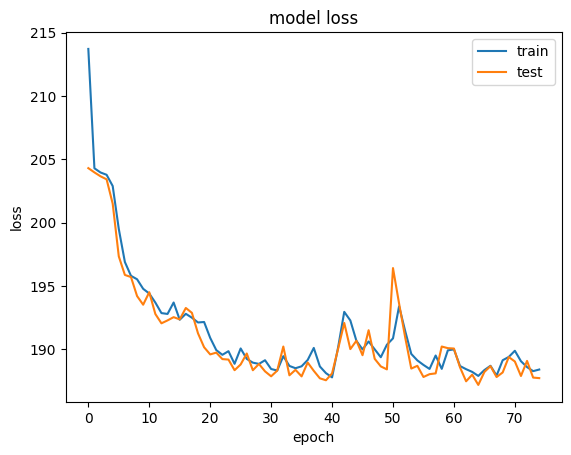

In [3]:
from src.visualization.plot_history_of_losses import plot_history_of_losses
plot_history_of_losses(history)

### Plot true vs prediction images

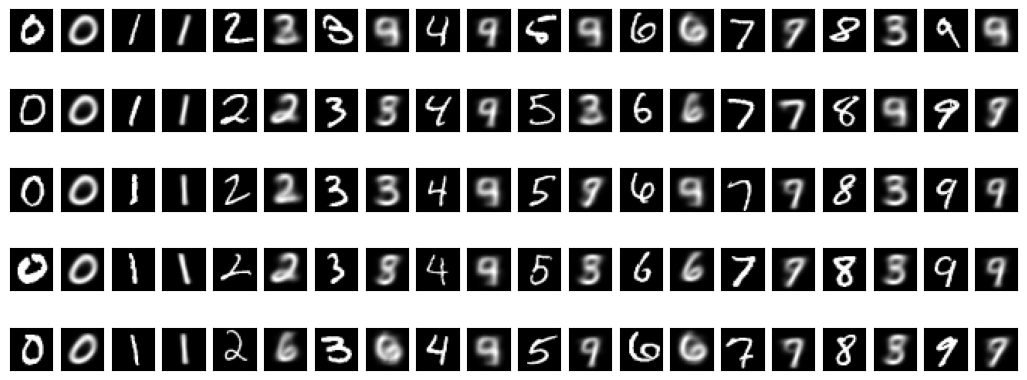

In [4]:
from src.visualization.mnist.plot_true_vs_prediction_images import plot_true_vs_prediction_images
plot_true_vs_prediction_images(vae, 
                               x_test,
                               y_test)

### Plot 1d distribution of latent space values

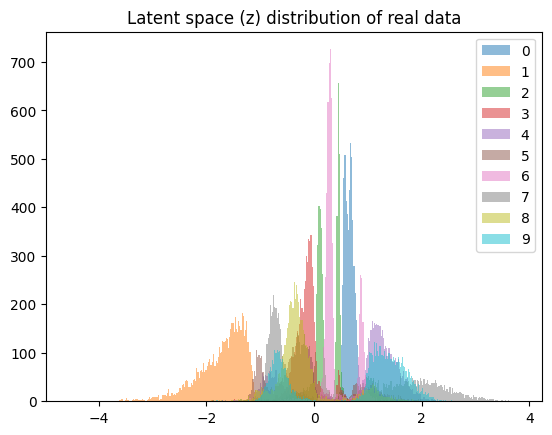

In [5]:
from src.visualization.plot_latent_space_1d_values import plot_latent_space_1d_values
plot_latent_space_1d_values(vae, 
                            x_train, 
                            y_train,
                            vae_latent_type='z')

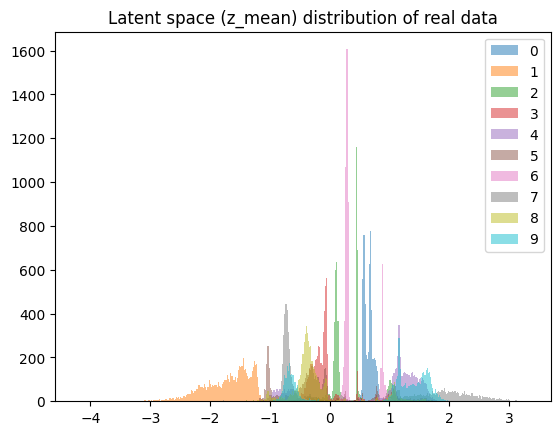

In [6]:
from src.visualization.plot_latent_space_1d_values import plot_latent_space_1d_values
plot_latent_space_1d_values(vae, 
                            x_train, 
                            y_train,
                            vae_latent_type='z_mean')

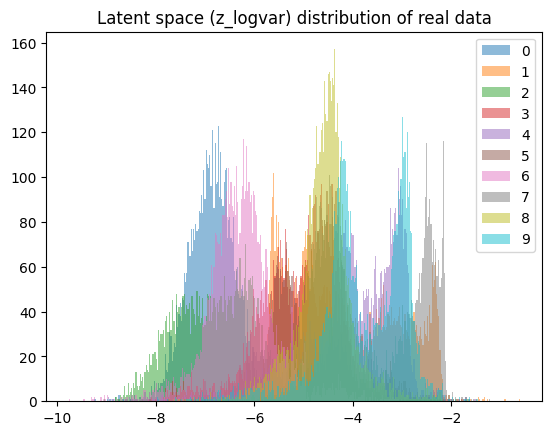

In [7]:
from src.visualization.plot_latent_space_1d_values import plot_latent_space_1d_values
plot_latent_space_1d_values(vae, 
                            x_train, 
                            y_train,
                            vae_latent_type='z_logvar')